# Working with data

In [ ]:
!nvidia-smi

Tue Mar  4 11:48:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader #pytorch iterable over a dataset
from torchvision import datasets #contains sample datasets with correponding labels
from torchvision.transforms import ToTensor #Domain specific datasets
import pandas as pd
import matplotlib.pyplot as plt

# Datasets include:
# classification -> CIFAR100, Caltech, FashionMNIS, MNIST, PCAM(histopathological scans of lymph nodes)
# image detection or segmentation -> MS coco, Wider face: A face detection benchmark
# Optical flow -> FlyingChairs(pattern recognition and image processing), KITTI(dataset for optical flow)
# Stereo Matching -> FallingThing dataset(A sysnthetic dataset for 3D object detection and pose estimation)
#                 -> CREstreo Practical Stereo Matching via Cascaded Recurrent Network with Adaptive Correlation
# Image captioning -> MS coco Captions
# Image pair -> LFW Datasets
# video classification -> HMDB: a large motion database, UCF101: a large action database, Generic Kinetics, UCF101
# video prediction -> MovingMnist

#download training data
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)



# Download test data from open datasets
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform =ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 109MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 4.71MB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 57.3MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.9MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
batch_size = 64

In [ ]:
training_dataloader = DataLoader(training_data,batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
training_dataloader
test_dataloader

In [ ]:
for X, y in test_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
# Display image and label (((
train_features, train_labels = next(iter(training_dataloader))

In [ ]:
train_features

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
train_labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5])

In [ ]:
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


In [ ]:
img = train_features[0].squeeze()
label =train_labels[0]

Label: 9


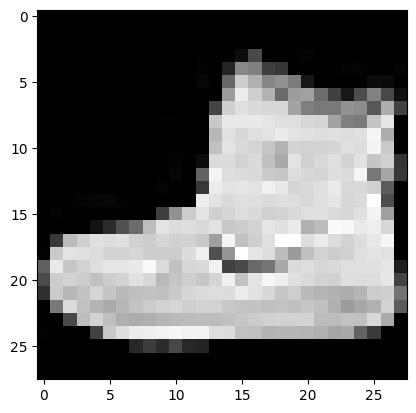

In [ ]:
plt.imshow(img,cmap="gray")
plt.show
print(f"Label: {label}")

## Creating Models

In [ ]:
from accelerate import Accelerator

In [ ]:
accelerator = Accelerator()
device = accelerator.device
device

device(type='cuda')

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
      )

  def forward(self, x):
    x =self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to()

In [ ]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

# Optimizing the Model parameters


To train a model, we need a loss function and an optimizer.


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and
backpropagates the prediction error to adjust the model parametersm

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X,y) in enumerate(dataloader):

    #ensures the model is on the correct device
    model.to(device)
    X,y = X.to(device), y.to(device)

    # compute prediction error
    pred = model(X)
    loss = loss_fn(pred,y)

    #Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")



Check the model performance against the test dataset to ensure it is learning

In [ ]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


\training process is conducted over several iterations (epochs) During each epoch, the model learns parameters to make better predictions. we print model accuracy and loss at each epoch.

Accuracy should increase and loss should descrease with every epoch


In [ ]:
epochs = 5

In [ ]:
for t in range(epochs):
  print(f"Epoch{t+1} \n---------------------------")
  train(training_dataloader, model, loss_fn, optimizer)
  test(test_dataloader,model, loss_fn)
print('Done!')

Epoch1 
---------------------------
loss: 2.294911 [   64/60000]
loss: 2.290008 [ 6464/60000]
loss: 2.275090 [12864/60000]
loss: 2.273142 [19264/60000]
loss: 2.262756 [25664/60000]
loss: 2.219676 [32064/60000]
loss: 2.233282 [38464/60000]
loss: 2.190315 [44864/60000]
loss: 2.194257 [51264/60000]
loss: 2.171718 [57664/60000]
Test Error: 
 Accuracy: 34.9%, Avg loss: 2.161577 

Epoch2 
---------------------------
loss: 2.170563 [   64/60000]
loss: 2.160178 [ 6464/60000]
loss: 2.111084 [12864/60000]
loss: 2.129864 [19264/60000]
loss: 2.077754 [25664/60000]
loss: 2.014647 [32064/60000]
loss: 2.051021 [38464/60000]
loss: 1.969311 [44864/60000]
loss: 1.976966 [51264/60000]
loss: 1.913796 [57664/60000]
Test Error: 
 Accuracy: 53.0%, Avg loss: 1.907662 

Epoch3 
---------------------------
loss: 1.939355 [   64/60000]
loss: 1.906152 [ 6464/60000]
loss: 1.800431 [12864/60000]
loss: 1.848430 [19264/60000]
loss: 1.724316 [25664/60000]
loss: 1.680322 [32064/60000]
loss: 1.716085 [38464/60000]
loss:

our model did not learn anything on CPU device. After getting a gpu - Tesla T4 on colab performnace improved and got a 64% accuracy and decreasing loss implying learning

---



Accelerators -> CUDA, MPS, MTIA, XPU

# Saving Models

to save models we serialize the internal state dictionary (containing model parameters)

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved Pytorch Model State to Model.pth")

Saved Pytorch Model State to Model.pth


# Loading Models

In [ ]:
!ls

data  model.pth  sample_data


In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

# *Let*'s try using the model to make predictions

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [ ]:
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Shirt", Actual: "Ankle boot"


model got the first prediction wrong